(2190, 13)


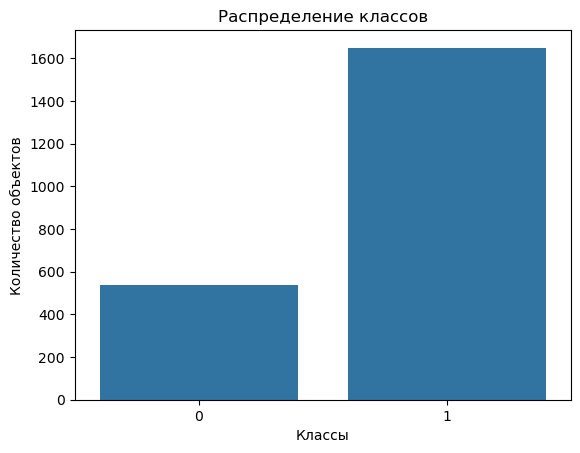

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv('data/sample_submission.csv') 
test = pd.read_csv('data/test.csv') 
train = pd.read_csv('data/train.csv')

print(train.shape)
# Подсчет количества объектов каждого класса
class_counts = Counter(train['rainfall'])

# Построение гистограммы
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xlabel('Классы')
plt.ylabel('Количество объектов')
plt.title('Распределение классов')
plt.show()

['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


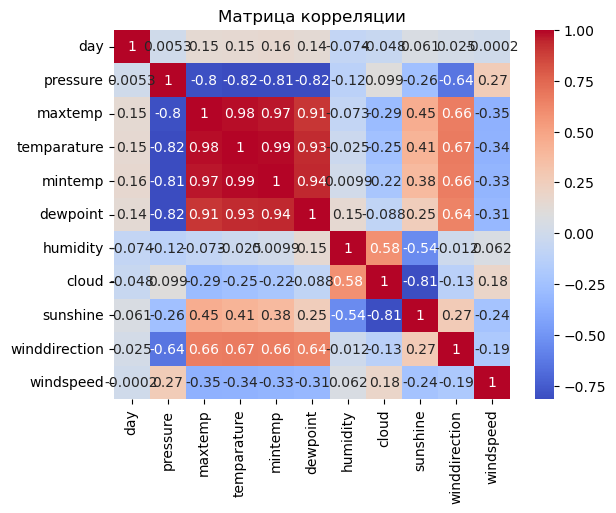

In [2]:
features = ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
print(features)
corr = train[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

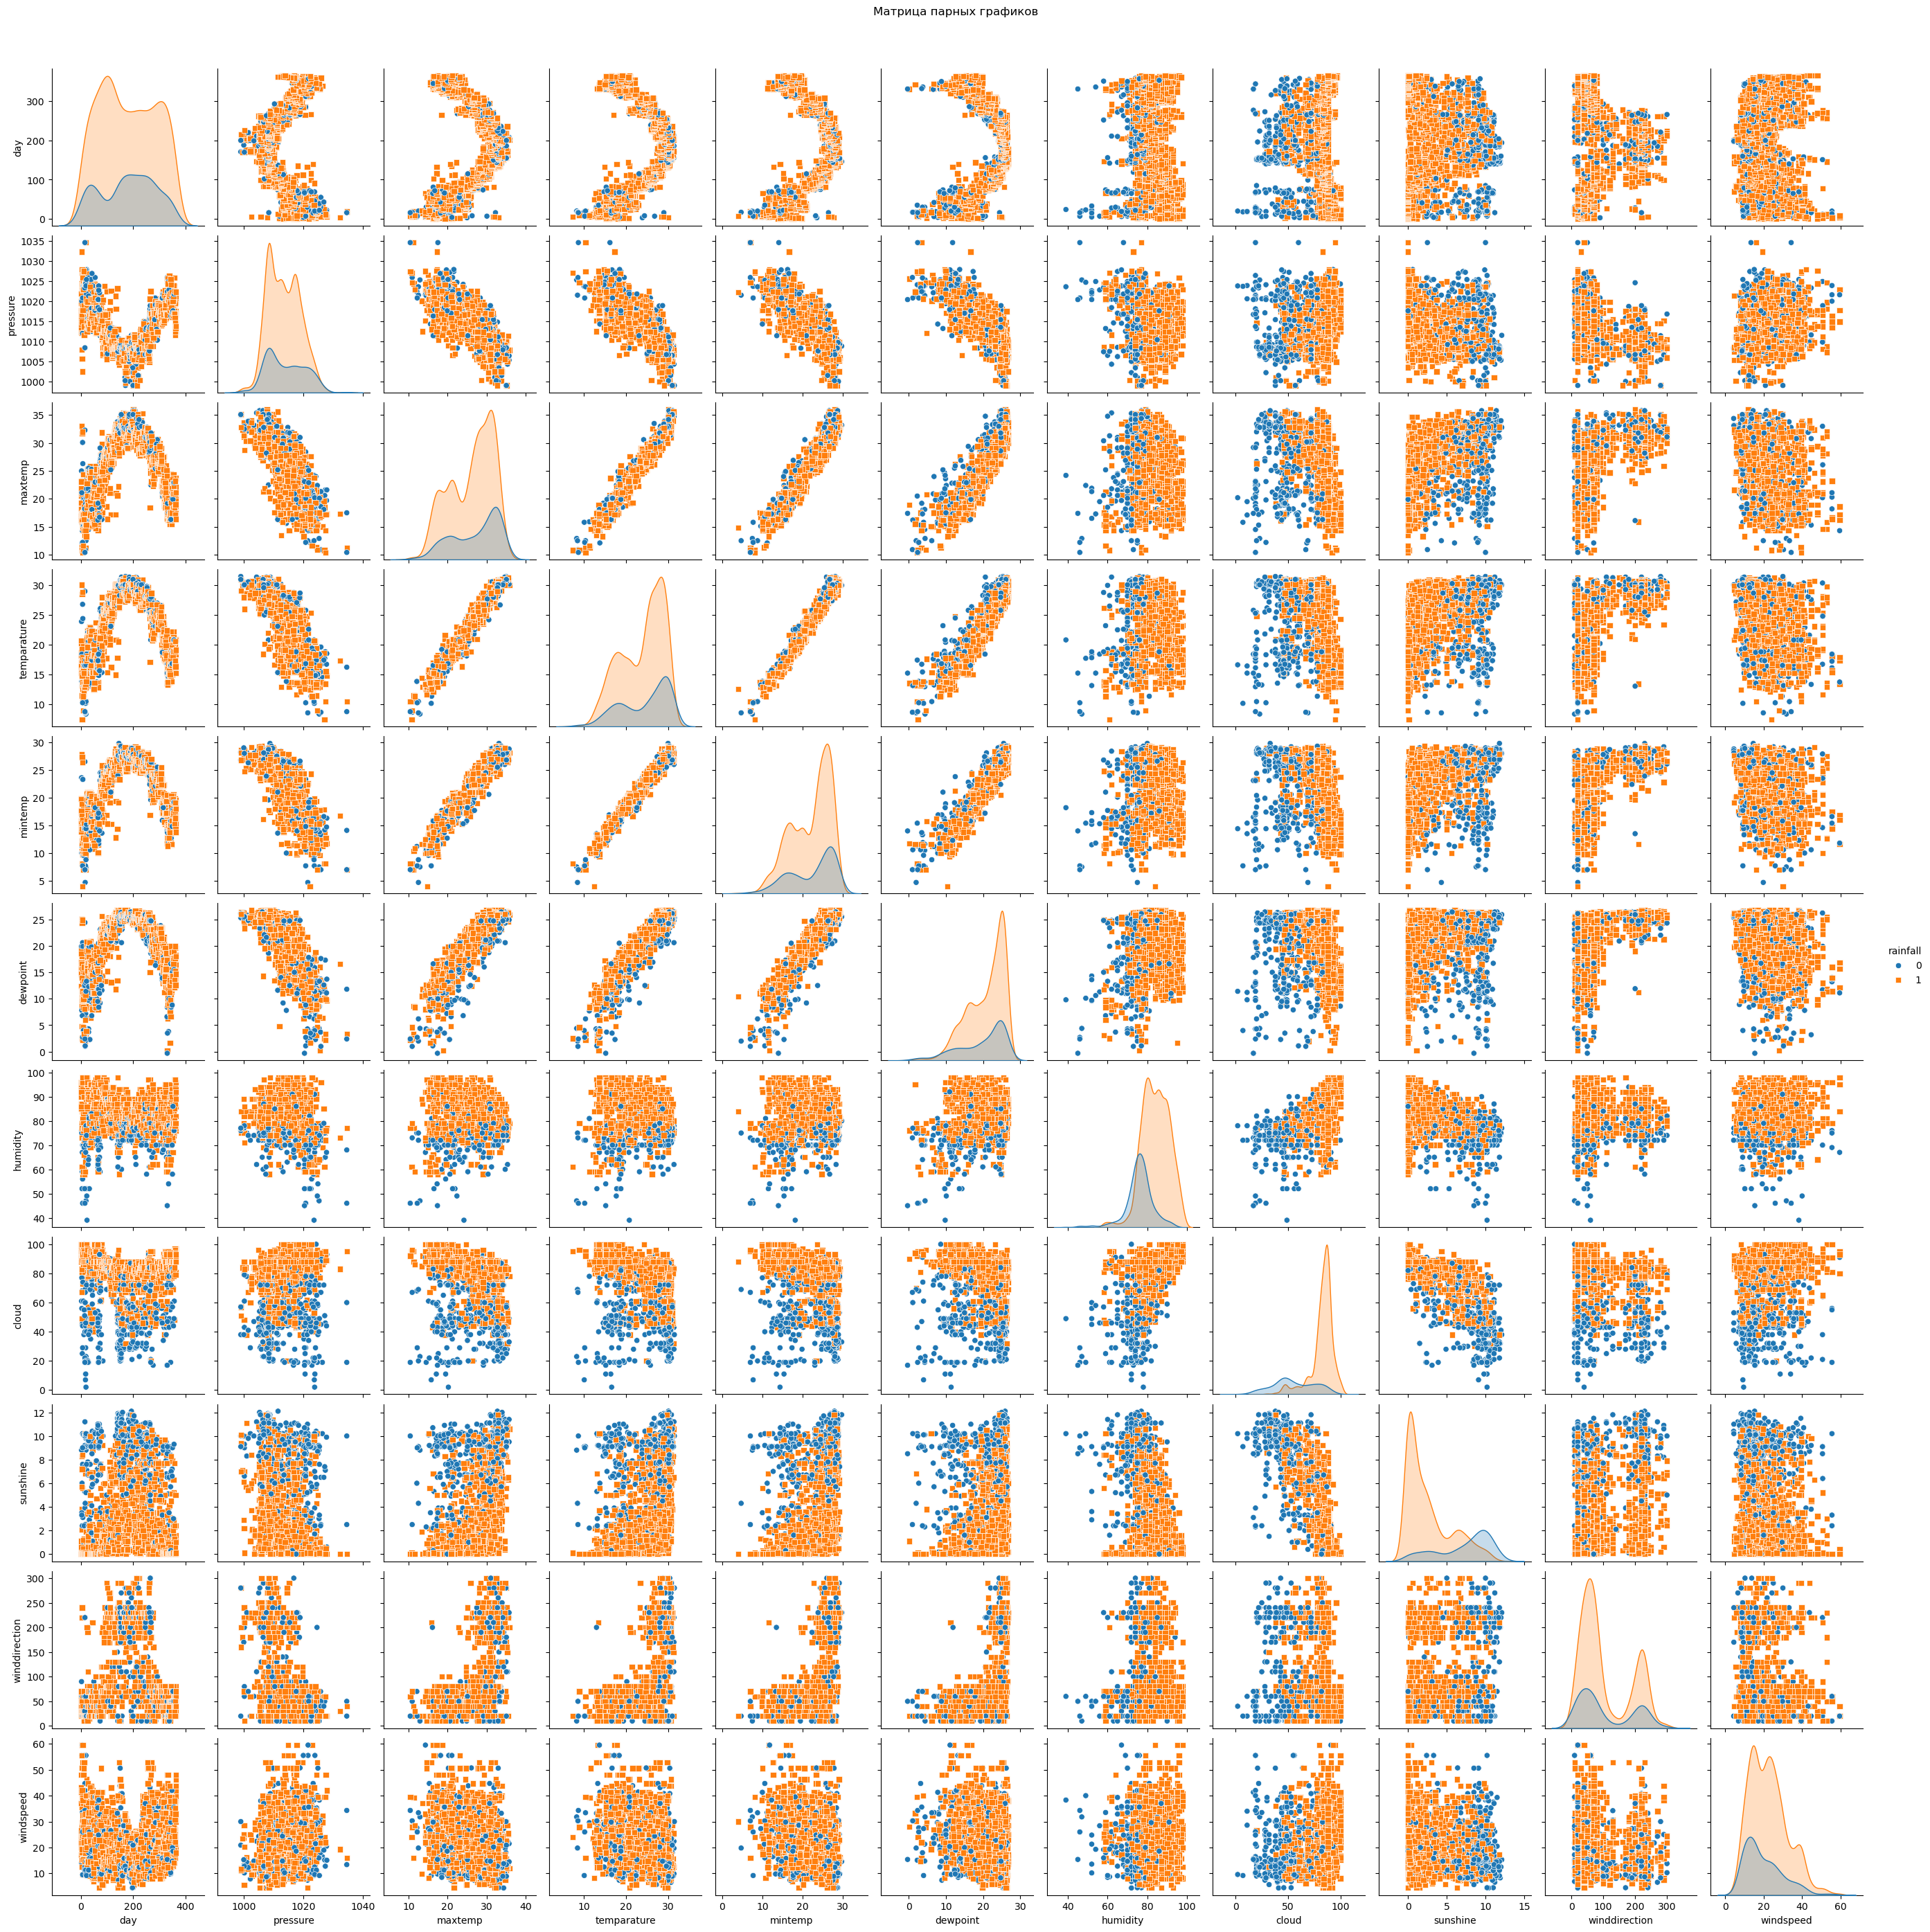

In [3]:
import numpy as np

# 1. Загрузка данных 
df = pd.read_csv('data/train.csv')
df = df.drop('id', axis = 1)
# Построение матрицы scatterplot и гистограмм
sns.pairplot(df, hue='rainfall', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Матрица парных графиков', y=1.02)
plt.show()

In [1]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score

# 1. Загрузка данных
df = pd.read_csv('data/train.csv')

# 2. Разделение на признаки (X) и целевую переменную (y)
X = df.drop('rainfall', axis=1)
#X = X.drop('day', axis=1)
X = X.drop('id', axis=1)
X = X.drop('winddirection', axis=1)
#X = X.drop('sunshine', axis=1)
#X = X.drop('cloud', axis=1)
#X = X.drop('windspeed', axis=1)
#X = X.drop('humidity', axis=1)

y = df['rainfall']

# 4. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Создание Pool для CatBoost (оптимизированный формат данных)
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

# 6. Обучение модели
model = CatBoostClassifier(
    iterations=100,  # Количество итераций (деревьев)
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',  # Метрика для оценки
    verbose=10  # Вывод лога каждые 10 итераций
)
model.fit(train_pool, eval_set=test_pool)

# 7. Предсказание на тестовых данных
y_pred = model.predict(test_pool)

# 8. Оценка качества
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))

# Предсказание вероятностей (для ROC-AUC нужны вероятности класса 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Расчёт ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# 9. Важность признаков
print("Важность признаков:", model.get_feature_importance())

0:	learn: 0.8521689	test: 0.8150685	best: 0.8150685 (0)	total: 142ms	remaining: 14s
10:	learn: 0.8727169	test: 0.8493151	best: 0.8561644 (6)	total: 165ms	remaining: 1.33s
20:	learn: 0.8795662	test: 0.8538813	best: 0.8561644 (6)	total: 184ms	remaining: 694ms
30:	learn: 0.8852740	test: 0.8470320	best: 0.8561644 (6)	total: 204ms	remaining: 454ms
40:	learn: 0.8869863	test: 0.8515982	best: 0.8561644 (6)	total: 222ms	remaining: 319ms
50:	learn: 0.8881279	test: 0.8493151	best: 0.8561644 (6)	total: 240ms	remaining: 231ms
60:	learn: 0.8909817	test: 0.8538813	best: 0.8561644 (6)	total: 258ms	remaining: 165ms
70:	learn: 0.8909817	test: 0.8561644	best: 0.8561644 (6)	total: 276ms	remaining: 113ms
80:	learn: 0.8932648	test: 0.8515982	best: 0.8561644 (6)	total: 294ms	remaining: 69ms
90:	learn: 0.8966895	test: 0.8538813	best: 0.8561644 (6)	total: 311ms	remaining: 30.7ms
99:	learn: 0.8989726	test: 0.8515982	best: 0.8561644 (6)	total: 328ms	remaining: 0us

bestTest = 0.8561643836
bestIteration = 6

Shri

Iteration 1, loss = 0.60427892
Iteration 2, loss = 0.51102509
Iteration 3, loss = 0.44364993
Iteration 4, loss = 0.39253621
Iteration 5, loss = 0.35925830
Iteration 6, loss = 0.33788719
Iteration 7, loss = 0.32677657
Iteration 8, loss = 0.32173497
Iteration 9, loss = 0.31877053
Iteration 10, loss = 0.31704316
Iteration 11, loss = 0.31629832
Iteration 12, loss = 0.31444176
Iteration 13, loss = 0.31269457
Iteration 14, loss = 0.31183677
Iteration 15, loss = 0.31084113
Iteration 16, loss = 0.31023879
Iteration 17, loss = 0.30913102
Iteration 18, loss = 0.30887384
Iteration 19, loss = 0.30833865
Iteration 20, loss = 0.30713886
Iteration 21, loss = 0.30643196
Iteration 22, loss = 0.30627904
Iteration 23, loss = 0.30551622
Iteration 24, loss = 0.30488720
Iteration 25, loss = 0.30440738
Iteration 26, loss = 0.30417353
Iteration 27, loss = 0.30347374
Iteration 28, loss = 0.30357756
Iteration 29, loss = 0.30293551
Iteration 30, loss = 0.30230664
Iteration 31, loss = 0.30196038
Iteration 32, los

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


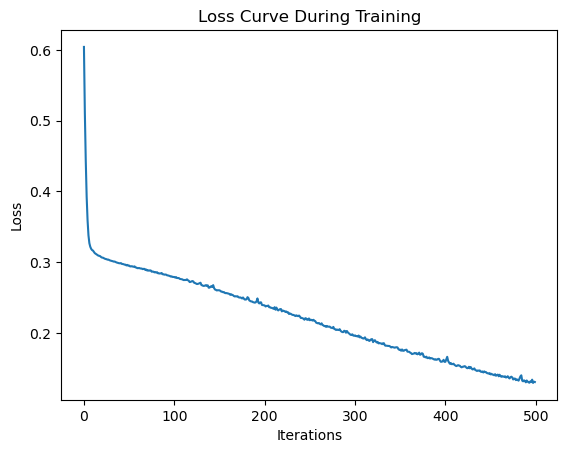

In [4]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 3. Масштабирование данных (MLP чувствителен к масштабу)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Создание и обучение MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # архитектура сети: 2 скрытых слоя (64 и 32 нейрона)
    activation='relu',            # функция активации ('relu', 'tanh', 'logistic' (сигмоида))
    solver='adam',                # алгоритм оптимизации ('adam', 'sgd', 'lbfgs')
    max_iter=500,                 # максимальное число итераций
    random_state=42,
    verbose=True                  # вывод лога обучения
)

mlp.fit(X_train_scaled, y_train)

# 5. Предсказание и оценка модели
y_pred = mlp.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Предсказание вероятностей (для ROC-AUC нужны вероятности класса 1)
y_pred_proba = mlp.predict_proba(X_test)[:, 1]

# Расчёт ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# 6. Визуализация кривой обучения
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from itertools import combinations
import matplotlib.pyplot as plt

def pairwise_regression_analysis(df):
    """
    Анализирует все пары признаков в датасете с помощью линейной регрессии.
    
    Параметры:
    - df: pandas DataFrame с числовыми признаками
    
    Возвращает:
    - Словарь с параметрами регрессии для каждой пары признаков
    """
    # Выбираем только числовые признаки
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    results = {}
    
    # Перебираем все возможные пары признаков
    for col1, col2 in combinations(numeric_cols, 2):
        # Подготовка данных
        X = df[[col1]].values
        y = df[col2].values
        
        # Обучение модели
        model = LinearRegression()
        model.fit(X, y)
        
        # Сохранение результатов
        results[(col1, col2)] = {
            'coefficient': model.coef_[0],  # Наклон (slope)
            'intercept': model.intercept_,   # Сдвиг (intercept)
        }

         # Построение графика для col1 -> col2
        '''
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='blue', label='Исходные данные')
        plt.plot(X, model.predict(X), color='red', linewidth=2, label=f'Регрессия: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f'Регрессия {col1} -> {col2}')
        plt.legend()
        plt.grid(True)
        plt.show()
        '''

        # Также строим регрессию в обратную сторону (col2 -> col1)
        X = df[[col2]].values
        y = df[col1].values
        model.fit(X, y)
        results[(col2, col1)] = {
            'coefficient': model.coef_[0],
            'intercept': model.intercept_,
        }
    
    return results


# Добавляем y_train как новый столбец
train_data = X_train.copy()
train_data[y_train.name] = y_train
# Разделение по классам
class_groups = train_data.groupby('rainfall')

# Получение данных 1 класса обучающей выборки
X_train_class_1 = class_groups.get_group(1)
X_train_class_1 = X_train_class_1.drop('rainfall', axis=1)

# Обучаем регресии на трейн выборке с меткой 1

regression_results_1 = pairwise_regression_analysis(X_train_class_1)

print(X_train_class_1.columns.tolist())
#print(len(regression_results))
#print(X_class_1)

['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed']


In [3]:
import igraph as ig

def build_parenclitic_network(df, regression_results, index):

    features = df.columns.tolist()
# Создаем граф
    g = ig.Graph(directed=True)
    
    # Добавляем вершины (названия признаков)
    g.add_vertices(features)
    g.vs["name"] = features
    
    # Собираем все отклонения и соответствующие пары
    deviations = []
    
    # Проходимся по всем парам фич
    for pair, params in regression_results.items():
        y = df.loc[index, pair[1]]
        x = df.loc[index, pair[0]]
        
        # Считаем абсолютное отклонение для точки
        deviation = np.abs(y - (params['coefficient']) * x - (params['intercept']))
        deviations.append((deviation, pair))
    
    # Сортируем отклонения по убыванию и берем топ-7
    deviations.sort(reverse=True, key=lambda x: x[0])
    top_12_deviations = deviations[:12]
    
    # Добавляем только топ-12 ребер
    for deviation, pair in top_12_deviations:
        g.add_edges([(pair[0], pair[1])])
        g.es[g.ecount()-1]["weight"] = 1  # используем реальное отклонение как вес
    
    return g

graph_list = []

print(X_train.columns.tolist())

X_train.reset_index(drop=True, inplace=True) 

for i in range(len(X)): 
    g = build_parenclitic_network(X, regression_results_1, i) 
    graph_list.append(g) # Добавляем граф в список
    
    
print(f"Создано {len(graph_list)} графов") 
print(f"В первом графе {graph_list[0].vcount()} вершин")

['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed']
Создано 2190 графов
В первом графе 10 вершин


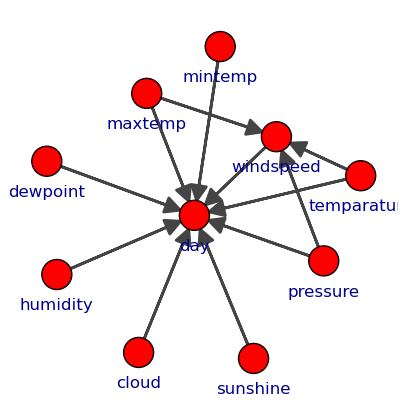

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    graph_list[0],
    target=ax,
    layout="kk", # print nodes in a circular layout
    vertex_size=30,
    vertex_label_dist = 1.5,
    vertex_label=g.vs["name"],
    vertex_label_color = "darkblue",
    margin = 50
)

plt.show()


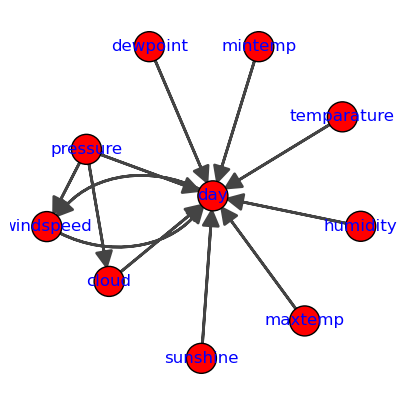

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    graph_list[3],
    target=ax,
    layout="kk", # print nodes in a circular layout
    vertex_size=30,
    vertex_label=g.vs["name"],
    vertex_label_color = "blue"
)

plt.show()

In [ ]:
# 4.1. Компоненты связности
print("\nКомпоненты связности:")
print(graph_list[0].components())

# 4.2. Радиус и диаметр графа
print(f"\nРадиус графа: {graph_list[0].radius()}")
print(f"Диаметр графа: {graph_list[0].diameter()}")

# 4.3. Плотность графа
print(f"Плотность графа: {graph_list[0].density():.3f}")

# 4.4. Центральность вершин
print("\nЦентральность по посредничеству:")
print(graph_list[0].betweenness())


Компоненты связности:
Clustering with 10 elements and 10 clusters
[ 0] sunshine
[ 1] cloud
[ 2] humidity
[ 3] dewpoint
[ 4] mintemp
[ 5] temparature
[ 6] maxtemp
[ 7] pressure
[ 8] windspeed
[ 9] day

Радиус графа: 0
Диаметр графа: 1
Плотность графа: 0.133

Центральность по посредничеству:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [4]:
from sklearn.preprocessing import LabelEncoder
# Находим диаметр
'''
diameter = []
for i in range(len(X)):
    diameter.append(graph_list[i].diameter())
X['diameter'] = diameter
'''

# Находим максимальную степень
max_degree = []
for i in range(len(X)):
    max_degree.append(max(graph_list[i].degree()))
X['max_degree'] = max_degree

# Находим глобальную кластеризацию
global_clustering = []
for i in range(len(X)):
    global_clustering.append(graph_list[i].transitivity_undirected())
X['global_clustering'] = global_clustering

# Cчитаем Энтропию распределения степеней
def calculate_entropy(g):
    degrees = np.array(g.degree())
    unique_degrees, counts = np.unique(degrees, return_counts=True)
    p_k = counts / counts.sum()
    entropy = -np.sum(p_k * np.log2(p_k))
    return entropy

# Находим Энтропию распределения степеней
entropyDisDeg = []
for i in range(len(X)):
    entropyDisDeg.append(calculate_entropy(graph_list[i]))
X['entropyDisDeg'] = entropyDisDeg

# Находим ассортативность 
assortativity  = []
for i in range(len(X)):
    assortativity.append(graph_list[i].assortativity_degree())
X['assortativity '] = assortativity 

# Находим ассортативность 
max_pagerank  = []
for i in range(len(X)):

    # Вычисляем PageRank (для взвешенного графа: `weights="weight"`)
    pagerank = graph_list[i].pagerank()

    # Находим индекс вершины с максимальным значением
    max_index = max(range(g.vcount()), key=lambda i: pagerank[i])

    # Получаем название вершины
    max_vertex_name = g.vs[max_index]["name"]
    max_pagerank_graph = pagerank[max_index]
    max_pagerank.append(max_vertex_name)
    
X['pagerank'] = max_pagerank 

X.drop('pagerank', axis = 1)

# Создаем и применяем кодировщик
le = LabelEncoder()
encoded_labels = le.fit_transform(X['pagerank'])

X['pagerank'] = encoded_labels

print(X.columns.tolist())
print(X.tail())

['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed', 'max_degree', 'global_clustering', 'entropyDisDeg', 'assortativity ', 'pagerank']
      day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
2185  361    1014.6     23.2         20.6     19.1      19.9      97.0   88.0   
2186  362    1012.4     17.2         17.3     16.3      15.3      91.0   88.0   
2187  363    1013.3     19.0         16.3     14.3      12.6      79.0   79.0   
2188  364    1022.3     16.4         15.2     13.8      14.7      92.0   93.0   
2189  365    1013.8     21.2         19.1     18.0      18.0      89.0   88.0   

      sunshine  windspeed  max_degree  global_clustering  entropyDisDeg  \
2185       0.1       22.1          10           0.146341       1.570951   
2186       0.0       35.3          10           0.146341       1.570951   
2187       5.0       32.9           9           0.200000       1.685475   
2188       0.1  

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Создание Pool для CatBoost (оптимизированный формат данных)
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

# 6. Обучение модели
model = CatBoostClassifier(
    iterations=100,  # Количество итераций (деревьев)
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',  # Метрика для оценки
    verbose=10  # Вывод лога каждые 10 итераций
)
model.fit(train_pool, eval_set=test_pool)

# 7. Предсказание на тестовых данных
y_pred = model.predict(test_pool)

# 8. Оценка качества
print("Accuracy ", accuracy_score(y_test, y_pred))
print("Precision ", precision_score(y_test, y_pred))
print("Recall ", recall_score(y_test, y_pred))

# Предсказание вероятностей (для ROC-AUC нужны вероятности класса 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# Получение важности признаков
feature_importance = model.get_feature_importance()

print(feature_importance)

0:	learn: 0.8430365	test: 0.8036530	best: 0.8036530 (0)	total: 2.4ms	remaining: 238ms
10:	learn: 0.8687215	test: 0.8493151	best: 0.8515982 (8)	total: 22.5ms	remaining: 182ms
20:	learn: 0.8778539	test: 0.8493151	best: 0.8515982 (8)	total: 41.9ms	remaining: 158ms
30:	learn: 0.8812785	test: 0.8447489	best: 0.8515982 (8)	total: 75ms	remaining: 167ms
40:	learn: 0.8835616	test: 0.8470320	best: 0.8515982 (8)	total: 107ms	remaining: 154ms
50:	learn: 0.8864155	test: 0.8470320	best: 0.8515982 (8)	total: 129ms	remaining: 124ms
60:	learn: 0.8904110	test: 0.8493151	best: 0.8515982 (8)	total: 146ms	remaining: 93.5ms
70:	learn: 0.8921233	test: 0.8515982	best: 0.8515982 (8)	total: 167ms	remaining: 68.4ms
80:	learn: 0.8904110	test: 0.8515982	best: 0.8515982 (8)	total: 183ms	remaining: 43ms
90:	learn: 0.8915525	test: 0.8538813	best: 0.8538813 (86)	total: 202ms	remaining: 19.9ms
99:	learn: 0.8932648	test: 0.8515982	best: 0.8538813 (86)	total: 219ms	remaining: 0us

bestTest = 0.8538812785
bestIteration = 